<a href="https://colab.research.google.com/github/fernandodeeke/epidemias/blob/main/sir_dem_no_sliders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

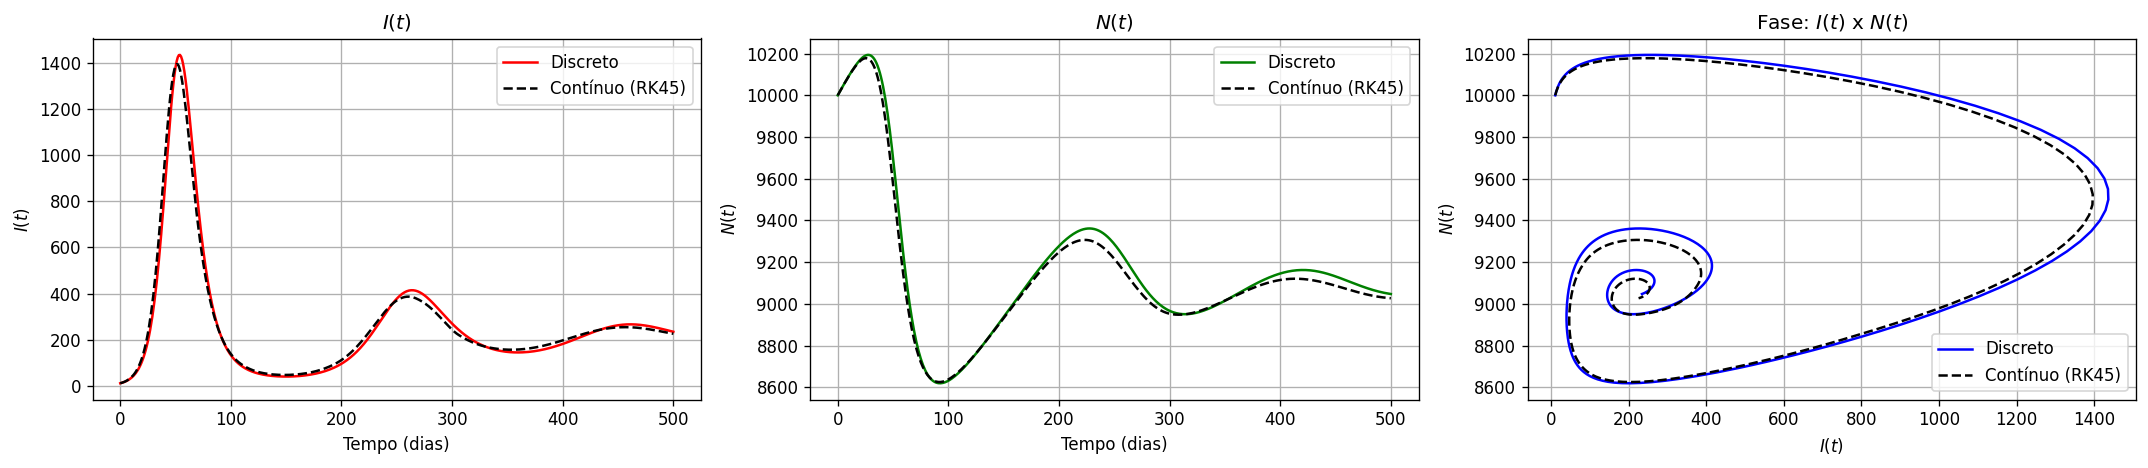

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -----------------------------
# Modelo SIR Discreto
# -----------------------------
def sir_disc(beta, gamma, nu, mu, alpha, N0, I0, R0, T):
    passos = int(T) + 1
    S, I, R, N = np.zeros(passos), np.zeros(passos), np.zeros(passos), np.zeros(passos)
    t = np.linspace(0, T, passos)
    S[0], I[0], R[0] = max(0, N0 - I0 - R0), I0, R0
    N[0] = S[0] + I[0] + R[0]

    for k in range(passos - 1):
        N[k] = S[k] + I[k] + R[k]
        S[k+1] = S[k] + (nu * N[k] - beta * S[k] * I[k] / N[k] - mu * S[k])
        I[k+1] = I[k] + (beta * S[k] * I[k] / N[k] - gamma * I[k] - (mu + alpha) * I[k])
        R[k+1] = R[k] + (gamma * I[k] - mu * R[k])
        N[k+1] = S[k+1] + I[k+1] + R[k+1]

    return t, S, I, R, N

# -----------------------------
# Modelo SIR Contínuo com RK45
# -----------------------------
def sir_continuo(beta, gamma, nu, mu, alpha, N0, I0, R0, T):
    def deriv(t, y):
        S, I, R = y
        N = S + I + R
        dS = nu * N - beta * S * I / N - mu * S
        dI = beta * S * I / N - gamma * I - (mu + alpha) * I
        dR = gamma * I - mu * R
        return [dS, dI, dR]

    S0 = max(0, N0 - I0 - R0)
    y0 = [S0, I0, R0]
    t_eval = np.linspace(0, T, int(T) + 1)
    sol = solve_ivp(deriv, [0, T], y0, t_eval=t_eval, method='RK45')
    S, I, R = sol.y
    N = S + I + R
    return sol.t, S, I, R, N

# -----------------------------
# Gráfico comparativo
# -----------------------------
def plot_comparativo(beta, gamma, nu, mu, alpha, N0, I0, R0, T):
    t_disc, S_d, I_d, R_d, N_d = sir_disc(beta, gamma, nu, mu, alpha, N0, I0, R0, T)
    t_cont, S_c, I_c, R_c, N_c = sir_continuo(beta, gamma, nu, mu, alpha, N0, I0, R0, T)

    fig, axs = plt.subplots(1, 3, figsize=(18, 4), dpi=120)

    axs[0].plot(t_disc, I_d, label='Discreto', color='red')
    axs[0].plot(t_cont, I_c, label='Contínuo (RK45)', color='black', linestyle='--')
    axs[0].set_title('$I(t)$')
    axs[0].set_xlabel('Tempo (dias)')
    axs[0].set_ylabel('$I(t)$')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(t_disc, N_d, label='Discreto', color='green')
    axs[1].plot(t_cont, N_c, label='Contínuo (RK45)', color='black', linestyle='--')
    axs[1].set_title('$N(t)$')
    axs[1].set_xlabel('Tempo (dias)')
    axs[1].set_ylabel('$N(t)$')
    axs[1].legend()
    axs[1].grid(True)

    axs[2].plot(I_d, N_d, label='Discreto', color='blue')
    axs[2].plot(I_c, N_c, label='Contínuo (RK45)', color='black', linestyle='--')
    axs[2].set_title('Fase: $I(t)$ x $N(t)$')
    axs[2].set_xlabel('$I(t)$')
    axs[2].set_ylabel('$N(t)$')
    axs[2].legend()
    axs[2].grid(True)

    plt.tight_layout()
    plt.show()

# -----------------------------
# Parâmetros para testar
# -----------------------------
plot_comparativo(
    beta=0.3, gamma=0.122, nu=0.0082, mu=0.0072, alpha=0.0420,
    N0=10000, I0=10, R0=0, T=500
)
